# Eli Thompson, Panther ID: 6268592

In [171]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')

# Exercise One

### 1. How many movie titles mention the  United States?

In [162]:
movietitles_unitedstates = df[df['title'].str.contains('United States')]

movietitles_unitedstatescount = movietitles_unitedstates.title.count()

print(movietitles_unitedstatescount)

2


### 2. How many movie descriptions mention the United States?

In [158]:
unitedstates_moviedescriptions = df[df['description'].str.contains('United States')]

moviedescriptionscount = unitedstates_moviedescriptions.title.count()

print(moviedescriptionscount)

5


### 3. How many movies are from the United States?

In [159]:
df_unitedstates = df[df['country'].str.contains('United States', case = False, na = False)]

moviesunitedstates = df_unitedstates.title.count()

print(moviesunitedstates)

3291


# Exercise Two

### Write a function to receive any name as input, search the director only and return the number of movies/TV shows that contain that name. Your function should meet the following requirements: 

- Your function should receive any name as an input string and return a simple message with the number of movies/TV shows that contain those names. E.g.  There are 5 directors named [supplied name] in this dataset.
- If the name supplied were not found in the database, return the message No directors were found with the name: [supplied name]
- Remember to deal with whatever letter case you are supplied i.e.  all caps or all lowercase, etc.
- Test your function with the word Paul and confirm that your result reads  There are [67] directors named [Paul] in this dataset.

In [165]:
name = input('Please enter the name of a director: ')
x = df[df['director'].str.contains(name, case = False, na= False)]
count = x.title.count()
if count > 0:
    print('The number of movies/TV shows that contain', name,'is:', count)
else:
    print('No directors were found with the name:',name)

Please enter the name of a director: paul
The number of movies/TV shows that contain paul is: 67


# Exercise Three

#### Identify the most common words in the description of TOP TEN LONGEST MOVIES ONLY from the dataset.  Please write down the 20 most common words you identify from the description of top ten longest movies.

#### Hint: Remember that you are only interested in the top 10 longest movies.


#### You will have to go online and FIND OUT HOW TO DO THIS! Find and use the learning resources out there on the internet and modify them for your purpose. Make sure to Include links/references you consulted to your final submission.

#### https://stackoverflow.com/questions/29903025/count-most-frequent-100-words-from-sentences-in-dataframe-pandas

In [184]:
df_longestfilms = df.nlargest(10,'duration_min')

from collections import Counter
mostcommon = Counter(" ".join(df["description"]).split()).most_common(20)

list(mostcommon)

[('a', 8819),
 ('the', 6814),
 ('to', 5566),
 ('and', 5565),
 ('of', 4691),
 ('in', 3268),
 ('his', 2998),
 ('with', 1870),
 ('her', 1797),
 ('for', 1543),
 ('an', 1487),
 ('their', 1461),
 ('on', 1448),
 ('A', 1315),
 ('from', 1031),
 ('is', 984),
 ('as', 926),
 ('by', 889),
 ('this', 858),
 ('he', 762)]

# Exercise Four

Write a function to receive a cast name as input, search the dataset and return information about 
that actor from the database. Your function should meet the following requirements:
- Your function should receive an actor name as an input string and return
    - (1) their average movie duration rounded up to a whole number, and
    - (2) a list of their movies from the list.
- If the actor name supplied is not found in the database, return the message: No movie found for the artist: [supplied actor name]. E.g, If I search for an artist named Jennifer Lopez, the function should return: No movie found for the artist: Jennifer Lopez (this is an example!!).
- Remember to deal with whatever letter case you are supplied i.e. all caps or all lowercase, etc.
- Remember to consider the file type of EVERY row of information when writing out your function.

In [170]:
castname = input("Please enter the name of an actor: ")
y = df[df['cast'].str.contains(castname, case = False, na= False)]
avgdur = y['duration_min'].mean()
if y.empty:
    print('No movie found for the actor',castname)
else:
    print('The average movie duration of',castname, 'is:',avgdur)
    print('The list of movies/TV shows that casts the name ',castname,', is shown below:', sep = '')
    yy = y
yy

Please enter the name of an actor: jennifer lopez
The average movie duration of jennifer lopez is: 99.33333333333333
The list of movies/TV shows that casts the name jennifer lopez, is shown below:


,Unnamed: 0,show_id,type,title,director,cast,country,rating,release_year,year_added,duration_min,number_of_seasons,listed_in,description
516,517,s518,Movie,Angel Eyes,Luis Mandoki,"Jennifer Lopez, Jim Caviezel, Sonia Braga, Ter...",United States,R,2001,2020,103.0,NaN,"Dramas, Romantic Movies","When a violent assault leaves her vulnerable, ..."
3634,3641,s3642,Movie,Lila & Eve,Charles Stone III,"Viola Davis, Jennifer Lopez, Andre Royo, Shea ...",United States,R,2015,2016,94.0,NaN,"Dramas, Thrillers","After each of them loses a child to murder, tw..."
4194,4202,s4203,Movie,Monster-in-Law,Robert Luketic,"Jennifer Lopez, Jane Fonda, Michael Vartan, Wa...","United States, Germany",PG-13,2005,2020,101.0,NaN,"Comedies, Romantic Movies",An office temp thinks she's found Mr. Right wh...


# Exercise Extra

#### Using a python graph library select one or two diagrams that will represent in the best way one of the exercises completed above. 

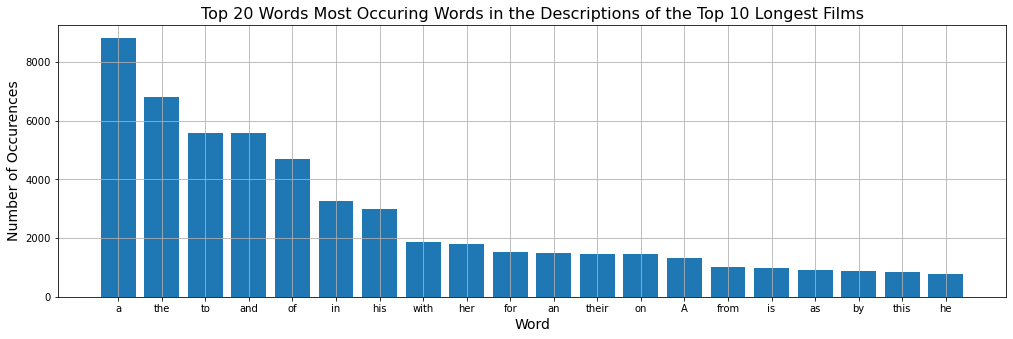

In [198]:
countries = df.nlargest(15,'release_year').groupby(['country']).count()
a = [item[0] for item in mostcommon]
b = [item[1] for item in mostcommon]

plt.figure(figsize = (17,5))
plt.bar(a,b)
plt.title('Top 20 Words Most Occuring Words in the Descriptions of the Top 10 Longest Films', size = 16)
plt.xticks(rotation = 'horizontal')
plt.xlabel('Word', size = 14)
plt.ylabel('Number of Occurences', size = 14)
plt.grid()
plt.show()